In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
df =  pd.read_csv(r"C:\Users\omkar\OneDrive\Desktop\Datasets\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.rename(columns = {'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns = {'Genre':'Gender'},inplace=True)

In [12]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [13]:
# There is no null values

## Data Prepocessing

In [6]:
# We don't need customer Id, because it's unique number for every customer, it doesn't give any pattern
df.drop(columns=['CustomerID'],inplace=True)

In [15]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
# Before doing the clustering we need convert categorical data to numerical data by approate enconding.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
# Since Gender column contains two categories any of the encoding is fine because at the end all gives the same output.
# It doesn't matter label-encoding or one-hot encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_df = encoder.fit_transform(df['Gender'])

In [9]:
encoded_df_new = pd.DataFrame(encoded_df,columns=['Gender_1'])


In [10]:
df = pd.concat([df,encoded_df_new],axis=1)


In [11]:
df.drop(columns=['Gender'],inplace=True)

In [12]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_1
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## K-Means clustering

In [22]:
# we need to find the optimal number of clusters(k) using Elbow curve

In [13]:
X = df.copy()

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
# from sklearn.cluster import KMeans

# sil_scores = []
# # Create a empty list for with cluster sum of squares.
# wcss = []
# # d = {}
# for k in range(1,11):
#     kmeans = KMeans(n_clusters = k, init='k-means++',)
#     kmeans.fit(X)
#     labels = kmeans.labels_
#     sil_score = silhouette_score(X, labels)
#     sil_scores.append(sil_score)
#     kmeans.fit(X)
#     # d[k] = kmeans.inertia_
#     wcss.append(kmeans.inertia_)
#     print(f'For k = {k}, Silhouette Score = {sil_score:.4f}')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []
wcss = []

for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)  # Fit and predict labels
    sil_score = silhouette_score(X, labels)  # Calculate silhouette score
    sil_scores.append(sil_score)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to centroids
    
    print(f'For k = {k}, Silhouette Score = {sil_score:.4f}')



For k = 2, Silhouette Score = 0.3319
For k = 3, Silhouette Score = 0.3355
For k = 4, Silhouette Score = 0.4053
For k = 5, Silhouette Score = 0.3574
For k = 6, Silhouette Score = 0.4153
For k = 7, Silhouette Score = 0.4417
For k = 8, Silhouette Score = 0.4325
For k = 9, Silhouette Score = 0.4089
For k = 10, Silhouette Score = 0.3964


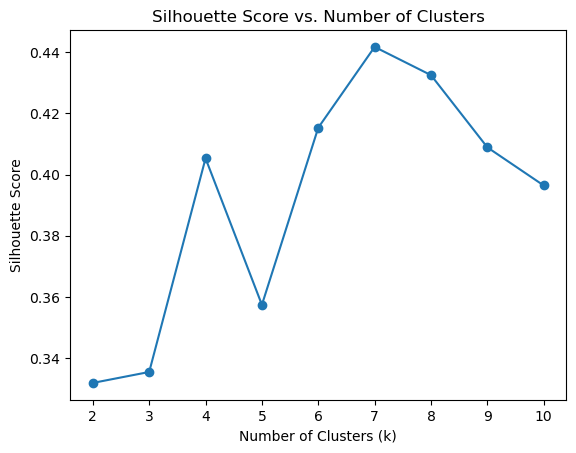

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(2, 11), sil_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [91]:
wcss

[221805.15899122803,
 159445.68010565356,
 104828.9264700212,
 97710.49524744373,
 68480.52916135815,
 51668.02092019823,
 44789.62663448393,
 42239.659397839394,
 38560.42503740363]

In [17]:
res_max = {}
for i in range(len(wcss)):
    if i+1 < len(wcss):
        res_max[i] = abs(wcss[i]-wcss[i+1])
    
res_max

{0: 62342.220384335174,
 1: 54379.54615942812,
 2: 7154.196412011879,
 3: 28935.656497138873,
 4: 16827.961779305828,
 5: 6809.625119739598,
 6: 2558.161688991633,
 7: 3703.094190854419}

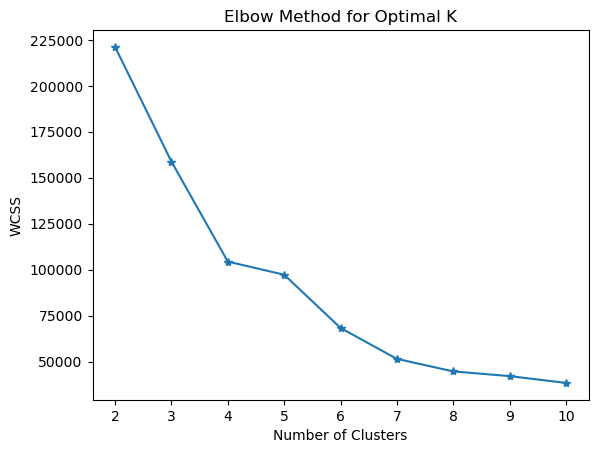

In [20]:
plt.plot(range(2, 11), wcss, marker='*', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [28]:
# By this optimal number is k=6 


In [22]:
from kneed import KneeLocator
kl = KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
kl.elbow

6

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, random_state=True)
X['cluster'] =  kmeans.fit_predict(X)

In [33]:
X


,Age,Annual Income (k$),Spending Score (1-100),Gender_1,cluster
0,19,15,39,1,4
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,2
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,3
196,45,126,28,0,1
197,32,126,74,1,3
198,32,137,18,1,1


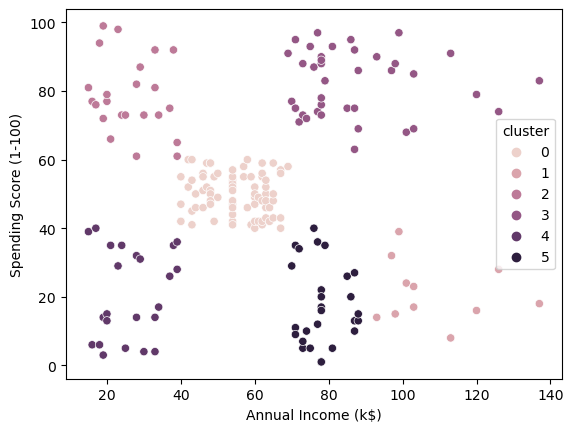

In [34]:
# Plot the groups 
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue ='cluster',data = X)
plt.show()

In [70]:
d = X.copy()

In [100]:
from sklearn.cluster import DBSCAN
for r in range(1,10):
    for m in range(3,10):
        dbs = DBSCAN(eps=r,min_samples=m)
        d['db_cluster'] = dbs.fit_predict(d)
    if d['db_cluster'].nunique() == 6:
        break
print(r,m)

9 9


In [101]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Ensure 'd' is a DataFrame or NumPy array
d1 = X.copy()  # Use a copy of data to avoid modifying original DataFrame

# Loop through different values of eps and min_samples
for r in range(1, 10):
    for m in range(3, 10):
        dbs = DBSCAN(eps=r, min_samples=m)
        clusters = dbs.fit_predict(d1)  # Fit DBSCAN
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Ignore noise (-1)

        # Check if the desired number of clusters (6) is reached
        if num_clusters == 6:
            print(f"Optimal eps = {r}, min_samples = {m}")
            break
    if num_clusters == 6:
        break


Optimal eps = 5, min_samples = 4


In [102]:
d1

,Age,Income,Score,Gender_1,cluster,db_cluster
0,19,15,39,1,4,-1
1,21,15,81,1,2,-1
2,20,16,6,0,4,-1
3,23,16,77,0,2,-1
4,31,17,40,0,4,-1
...,...,...,...,...,...,...
195,35,120,79,0,3,-1
196,45,126,28,0,1,-1
197,32,126,74,1,3,-1
198,32,137,18,1,1,-1


In [103]:
dbs =  DBSCAN(eps=5,min_samples=4)

d1['db_cluster'] = dbs.fit_predict(d1) 

In [104]:
d1

,Age,Income,Score,Gender_1,cluster,db_cluster
0,19,15,39,1,4,-1
1,21,15,81,1,2,0
2,20,16,6,0,4,-1
3,23,16,77,0,2,0
4,31,17,40,0,4,-1
...,...,...,...,...,...,...
195,35,120,79,0,3,-1
196,45,126,28,0,1,-1
197,32,126,74,1,3,-1
198,32,137,18,1,1,-1


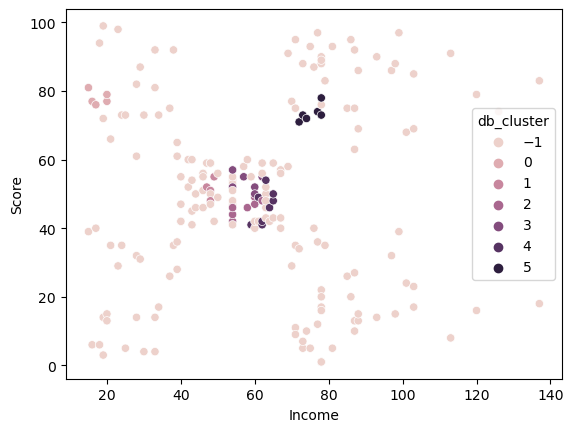

In [105]:
sns.scatterplot(x='Income',y='Score',hue='db_cluster',data = d1)
plt.show()